# fft 변형 코드
작성자 : 임가현(sona)

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./20220203/leak/SWFLB-20210225-0106-0259_20210811_124704_004.csv', encoding='cp949')
data.columns = ['hz', 'col']
data = data.iloc[0:4102, :] # 4096까지만 사용


col = data.iloc[:6, :]
col = col.transpose()
col.rename(columns=col.iloc[0], inplace=True)
col = col.drop(col.index[0])
col = col.reset_index(drop=True)

hz = data.iloc[6:, 0:1]
hz = hz.astype(int)

hz.reset_index(drop=True, inplace=True)
hz = np.array(hz)
hz = hz.reshape(-1,)

sample_rate = int(col['SampleRate'][0]) * 1024

In [3]:
# 0번에서 튀는 값을 잡아주기 위한 평균 빼기
hz = hz - hz.mean()

xf = np.fft.fftfreq(sample_rate, 1 / sample_rate)

yf = np.fft.fft(hz)
yf = np.abs(yf[:int(sample_rate/2)])
yf = np.abs(yf) / (len(hz)/2)
yf = pd.DataFrame(yf)
yf = yf.T

In [4]:
yf

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.175063,0.08299,0.155477,0.166881,0.056728,0.108492,0.023229,0.055705,0.075025,...,0.120421,0.018013,0.054275,0.056745,0.05108,0.041828,0.120009,0.106964,0.129708,0.05128


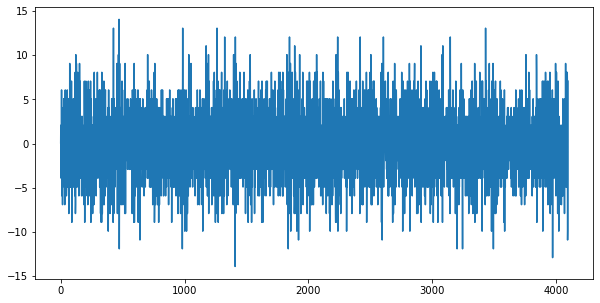

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hz)

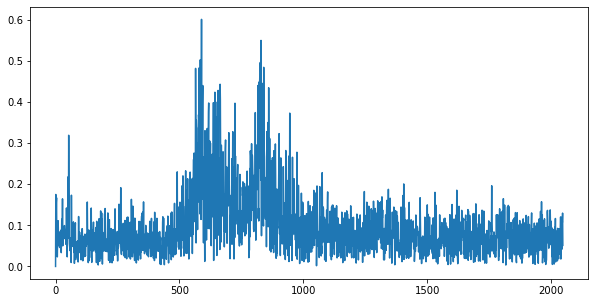

In [8]:
plt.figure(figsize=(10,5))
plt.plot(yf.T)

# 대표님

In [7]:
path = './20220203/leak/SWFLB-20210225-0106-0259_20210811_124704_004.csv'
vib = pd.read_csv(path, encoding='cp949', header=None, skiprows=7)
Fs = amount = pd.read_csv(path, header=None, skiprows=5, nrows=1, encoding='cp949')
Fs = Fs.values[0,1] * 1024
vib = np.asarray(vib[:Fs]).transpose()

# FreqFeatureExtractor = Extract_Freq_Features(vib, Fs)
# _, yf = FreqFeatureExtractor.FFT()

# freq = pd.DataFrame(yf)

In [8]:
rawTimeData = vib

_FreqFeatures = []
_rawTimeData = rawTimeData - np.expand_dims(np.mean(rawTimeData, axis=1), axis=1)  # Raw time data
_Fs = Fs  # Sampling frequency [Hz]

_N = _rawTimeData.shape[1]
_dt = _Fs
_yf_temp = np.fft.fft(_rawTimeData)
_yf = np.abs(_yf_temp[:, :int(_N / 2)]) / (_N / 2)

# _xf = np.fft.fftfreq(_N, d=_dt)[:int(_N / 2)]
# _xf = _xf * 2

In [9]:
pd.DataFrame(_yf)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.175063,0.08299,0.155477,0.166881,0.056728,0.108492,0.023229,0.055705,0.075025,...,0.120421,0.018013,0.054275,0.056745,0.05108,0.041828,0.120009,0.106964,0.129708,0.05128


# rfft
fft를 반절 자른 형태로 총 길이는 n//2 +1로 나타난다.  
여기서 4096을 rfft하면 2048이 아니라 2049 컬럼으로 나타나는 것을 확인할 수 있다.  
이는 0을 기준으로 반으로 나눈 값이기 때문에 2049번째에 추가로 계산값을 하나 더 넣어준다. (하지만 정확하게 무슨 값인지 이해 못함)  

yf를 구할 때 len(hz)(=4096=N)로 나눠주는데 rfft는 반절만 계산하기 때문에 (len(hz)/2)로 나누어주면 된다.

In [61]:
data = pd.read_csv('./20220203/leak/SWFLB-20210225-0106-0259_20210811_124704_004.csv', encoding='cp949')
data.columns = ['hz', 'col']
data = data.iloc[0:4102, :] # 4096까지만 사용


col = data.iloc[:6, :]
col = col.transpose()
col.rename(columns=col.iloc[0], inplace=True)
col = col.drop(col.index[0])
col = col.reset_index(drop=True)

hz = data.iloc[6:, 0:1]
hz = hz.astype(int)

hz.reset_index(drop=True, inplace=True)
hz = np.array(hz)
hz = hz.reshape(-1,)

sample_rate = int(col['SampleRate'][0]) * 1024

In [62]:
hz = hz - hz.mean()

xf = np.fft.rfftfreq(sample_rate, 1 / sample_rate)

yf = np.fft.rfft(hz) / (len(hz)/2)
yf = np.abs(yf)
yf = pd.DataFrame(yf)
yf = yf.T

In [63]:
yf

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.0,0.175063,0.08299,0.155477,0.166881,0.056728,0.108492,0.023229,0.055705,0.075025,...,0.018013,0.054275,0.056745,0.05108,0.041828,0.120009,0.106964,0.129708,0.05128,0.163086


In [18]:
# '''

#     n = sample_rate * duration
#         >> 애초에 데이터를 앞에서 4096만 가지고 왔기 때문에 n = sample_rate

#     hz = hz - hz.mean()
#         >> 0hz에서의 peak 값을 잡아주기 위함

#     xf = np.fft.rfftfreq(n, 1 / sample_rate)
#         >> n이 4096뿐 아니라 8192 이상이었다면 그 길이에 맞게 n을 설정해야하지만 여기서 n = sample_rate
#             fs와 sample_rate가 단일로 적용되는 경우 yf의 결과는 (n//2)+1로 나타남 0hz = 0*fs

#     yf = np.fft.rfft(hz) / len(hz)
#     yf = np.abs(yf)
#         >> 절대값으로 변환

#     yf = pd.DataFrame(yf)
#         >> 데이터프레임으로 변환

#     yf = yf.T
#         >> 이후 col 정보와 join하기 위해서 transfer

# '''

600rpm = 10hz  
rpm = 분당 회전수  
hz = 초당 샘플수  
600rpm / 60s = 10hz